In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as sk_LinearRegression

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X.shape, y.shape

((442, 10), (442,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# OLS

In [7]:
from algosfromscratch.supervised_learning import LinearRegression

In [8]:
lr = LinearRegression(method='OLS')

In [9]:
lr.fit(X_train, y_train)

In [10]:
lr.intercept_, lr.coef_

(154.35898821355187,
 array([ -20.41129305, -265.88594023,  564.64844662,  325.55650029,
        -692.23796104,  395.62249978,   23.52910434,  116.37102129,
         843.98257585,   12.71981044]))

In [11]:
y_pred = lr.predict(X_test)

In [12]:
np.sum((y_pred - y_test) ** 2)

679648.6699179362

In [13]:
lr_sk = sk_LinearRegression()

In [14]:
lr_sk.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_sk.intercept_, lr_sk.coef_

(154.3589882135515,
 array([ -20.41129305, -265.88594023,  564.64844662,  325.55650029,
        -692.23796104,  395.62249978,   23.52910434,  116.37102129,
         843.98257585,   12.71981044]))

In [16]:
y_pred_sk = lr_sk.predict(X_test)

In [17]:
np.mean((y_pred_sk - y_test) ** 2)

3075.3333480449564

# Stochastic GD (batch_size = 1)

In [18]:
lr_sgd = LinearRegression(method='GD', batch_size=1, learning_rate=0.0001, num_epochs=1000)

In [19]:
lr_sgd.fit(X_train, y_train)

In [20]:
lr_sgd.intercept_, lr_sgd.coef_

(150.68263240922462,
 array([ 12.38175129,   1.0003208 ,  43.89739276,  35.98969299,
         19.65301634,  15.202419  , -32.94004305,  35.38907656,
         50.32867859,  32.89562717]))

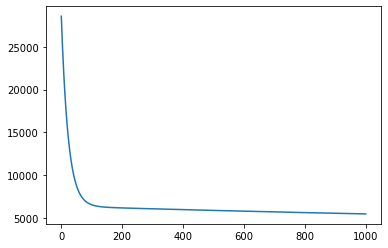

In [21]:
_ = plt.plot(lr_sgd.training_losses)

plt.show()

In [22]:
y_pred_sgd = lr_sgd.predict(X_test)

In [23]:
np.mean((y_pred_sgd - y_test) ** 2)

4785.580060169811

# Mini-Batch GD (batch_size = 20)

In [24]:
lr_mbgd = LinearRegression(method='GD', batch_size=20, learning_rate=0.0005, num_epochs=5000)

In [25]:
lr_mbgd.fit(X_train, y_train)

In [26]:
lr_mbgd.intercept_, lr_mbgd.coef_

(160.3679772419092,
 array([ 26.04796901,  13.55924578,  74.85681041,  44.3237965 ,
         33.01182781,  21.10644939, -44.84093078,  51.12058994,
         81.80175421,  63.35005038]))

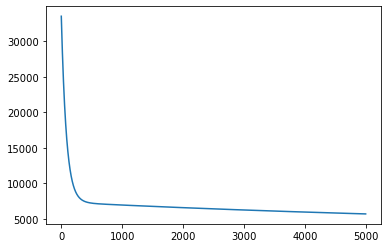

In [27]:
_ = plt.plot(lr_mbgd.training_losses)

plt.show()

In [28]:
y_pred_mbgd = lr_mbgd.predict(X_test)

In [29]:
np.mean((y_pred_mbgd - y_test) ** 2)

4489.239130597779

# Batch GD (batch_size = inf)

In [30]:
lr_bgd = LinearRegression(method='GD', batch_size=float('inf'), learning_rate=0.001, num_epochs=50000)

In [31]:
lr_bgd.fit(X_train, y_train)

In [32]:
lr_bgd.intercept_, lr_bgd.coef_

(150.81961573856393,
 array([ 23.1403506 ,  -2.16553499,  91.81536888,  72.96869629,
         36.44328218,  26.55258899, -66.70772321,  69.19705083,
        103.3866988 ,  64.77782506]))

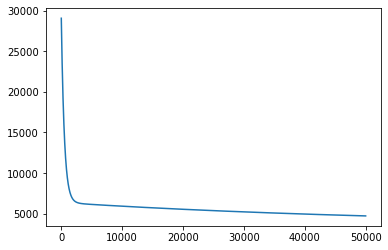

In [33]:
_ = plt.plot(lr_bgd.training_losses)

plt.show()

In [34]:
y_pred_bgd = lr_bgd.predict(X_test)

In [35]:
np.mean((y_pred_bgd - y_test) ** 2)

4221.139917744185